C:\Users\ahosain\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\ahosain\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\functional.py:5560: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = scaled_dot_product_attention(q, k, v, attn_mask, dropout_p, is_causal)


Transformer L1 H2 Epoch 1/30: Train Loss 5.2360 | Val Loss 4.7900 | Val Acc 18.39%
Transformer L1 H2 Epoch 2/30: Train Loss 4.4660 | Val Loss 4.6403 | Val Acc 22.13%
Transformer L1 H2 Epoch 3/30: Train Loss 4.1157 | Val Loss 4.6222 | Val Acc 21.22%
Transformer L1 H2 Epoch 4/30: Train Loss 3.8084 | Val Loss 4.4698 | Val Acc 28.70%
Transformer L1 H2 Epoch 5/30: Train Loss 3.5063 | Val Loss 4.3519 | Val Acc 30.57%
Transformer L1 H2 Epoch 6/30: Train Loss 3.2046 | Val Loss 4.2740 | Val Acc 33.51%
Transformer L1 H2 Epoch 7/30: Train Loss 2.9160 | Val Loss 4.2404 | Val Acc 34.80%
Transformer L1 H2 Epoch 8/30: Train Loss 2.6709 | Val Loss 4.2063 | Val Acc 30.57%
Transformer L1 H2 Epoch 9/30: Train Loss 2.4559 | Val Loss 4.1838 | Val Acc 31.16%
Transformer L1 H2 Epoch 10/30: Train Loss 2.2063 | Val Loss 4.1269 | Val Acc 33.73%
Transformer L1 H2 Epoch 11/30: Train Loss 2.0388 | Val Loss 4.1079 | Val Acc 33.03%
Transformer L1 H2 Epoch 12/30: Train Loss 1.8469 | Val Loss 4.1818 | Val Acc 34.90%
T

C:\Users\ahosain\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Transformer L1 H4 Epoch 3/30: Train Loss 4.0710 | Val Loss 4.5488 | Val Acc 25.66%
Transformer L1 H4 Epoch 4/30: Train Loss 3.7580 | Val Loss 4.3646 | Val Acc 29.40%
Transformer L1 H4 Epoch 5/30: Train Loss 3.4462 | Val Loss 4.2193 | Val Acc 36.18%
Transformer L1 H4 Epoch 6/30: Train Loss 3.1901 | Val Loss 4.1039 | Val Acc 37.36%
Transformer L1 H4 Epoch 7/30: Train Loss 2.8605 | Val Loss 3.9856 | Val Acc 37.95%
Transformer L1 H4 Epoch 8/30: Train Loss 2.6304 | Val Loss 3.9332 | Val Acc 37.36%
Transformer L1 H4 Epoch 9/30: Train Loss 2.3959 | Val Loss 3.9438 | Val Acc 37.95%
Transformer L1 H4 Epoch 10/30: Train Loss 2.1903 | Val Loss 3.9271 | Val Acc 36.08%
Transformer L1 H4 Epoch 11/30: Train Loss 1.9676 | Val Loss 3.9940 | Val Acc 37.25%
Transformer L1 H4 Epoch 12/30: Train Loss 1.8261 | Val Loss 3.9004 | Val Acc 36.67%
Transformer L1 H4 Epoch 13/30: Train Loss 1.6674 | Val Loss 3.9173 | Val Acc 36.67%
Transformer L1 H4 Epoch 14/30: Train Loss 1.5374 | Val Loss 3.8747 | Val Acc 38.64%

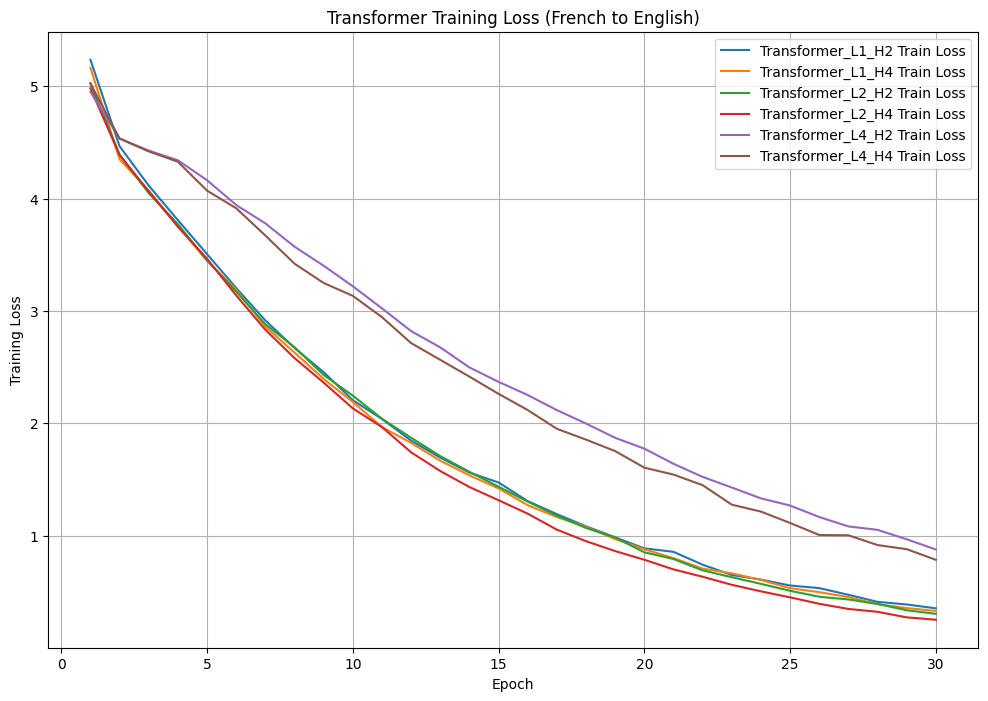

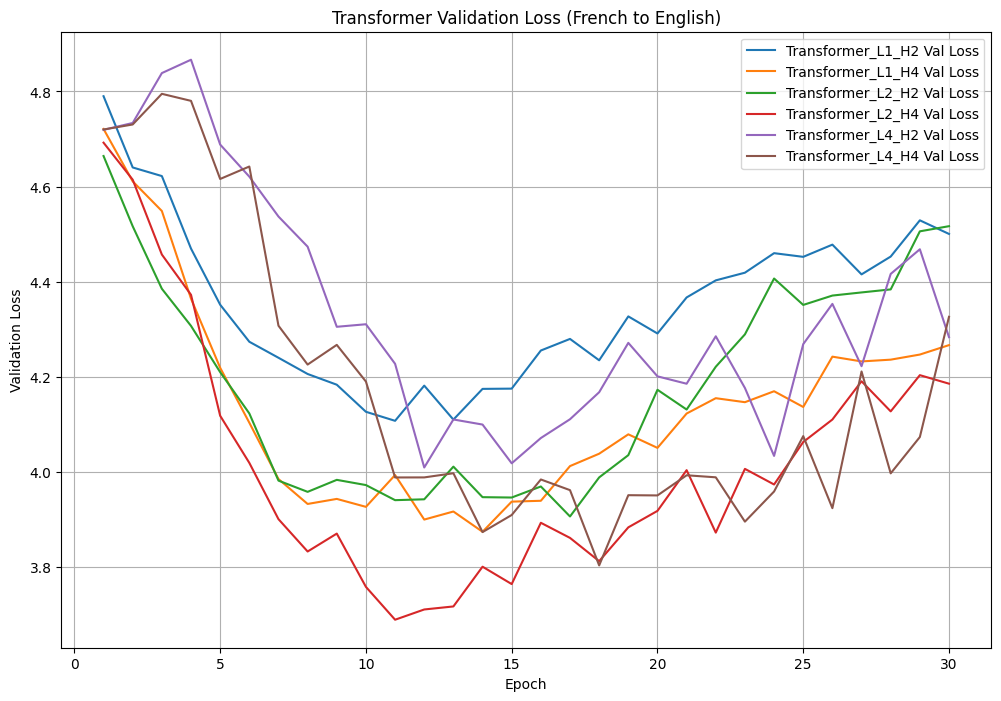

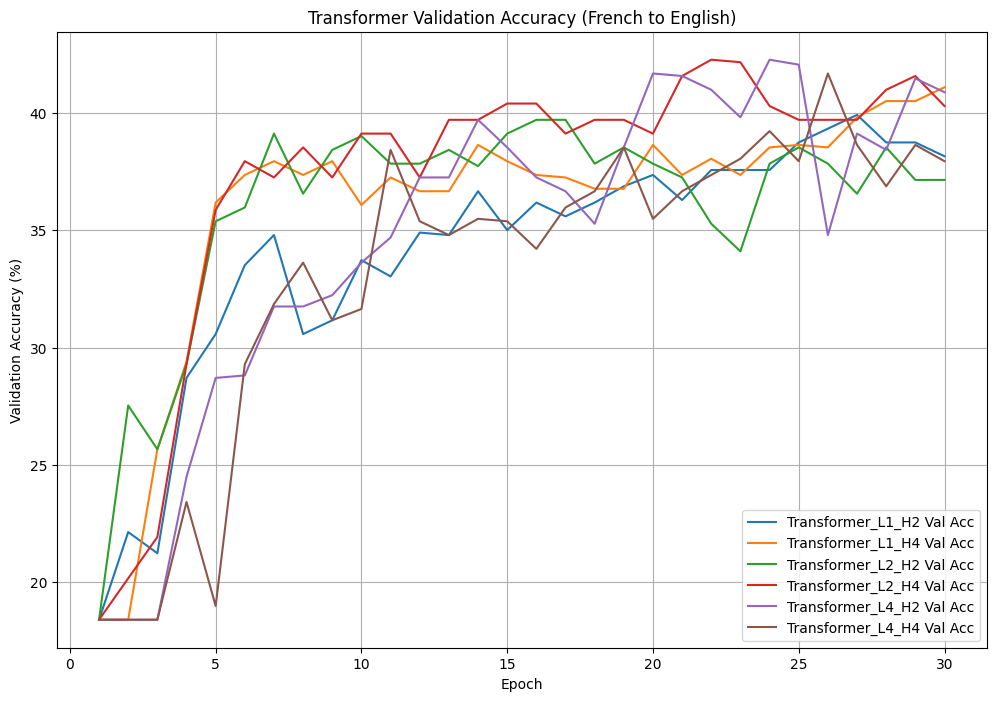

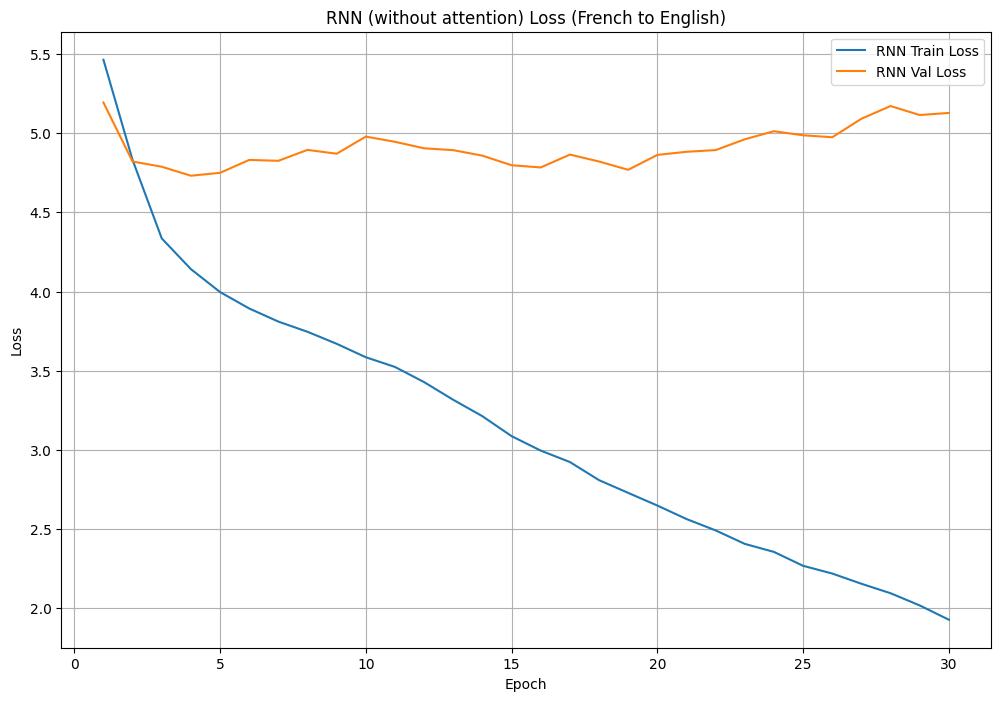

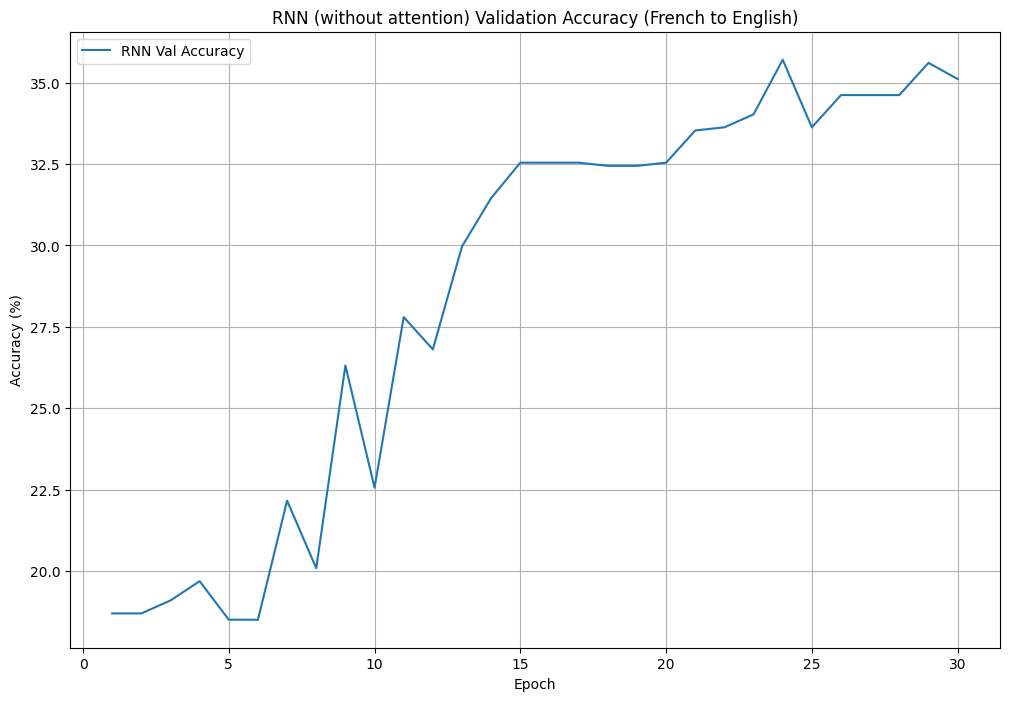

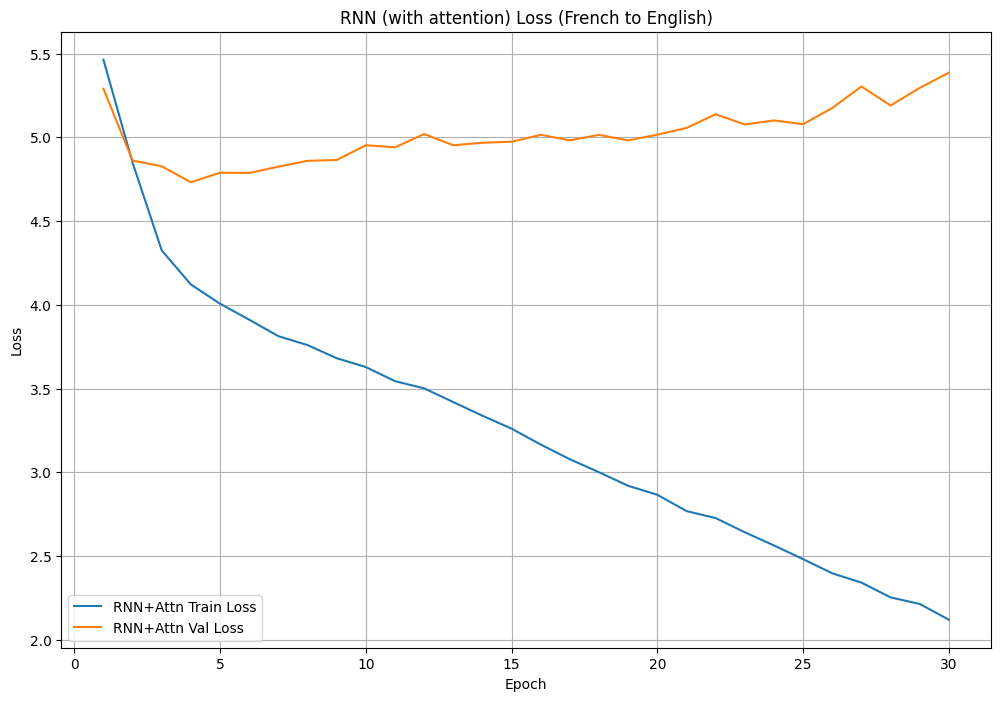

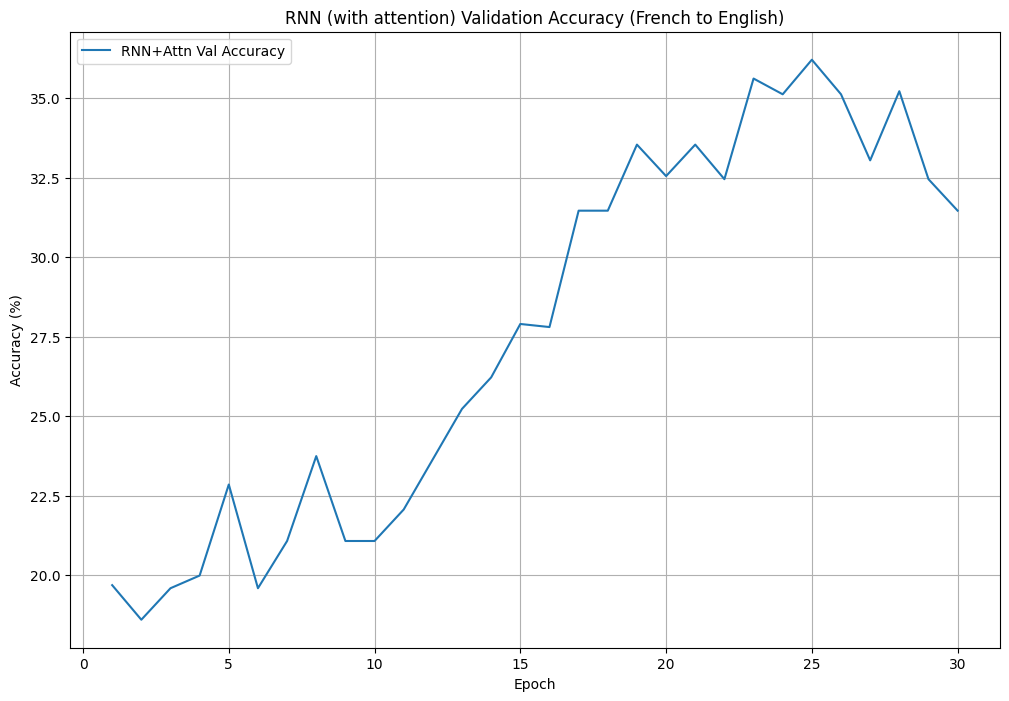


=== Transformer Model Complexities ===
Transformer_L1_H2: Parameter Count = 431482
Transformer_L1_H4: Parameter Count = 431482
Transformer_L2_H2: Parameter Count = 762746
Transformer_L2_H4: Parameter Count = 762746
Transformer_L4_H2: Parameter Count = 1425274
Transformer_L4_H4: Parameter Count = 1425274

Note: Transformer computational complexity per layer is O(seq_length^2) (here, seq_length = 9)

--- Qualitative Translation Examples (French to English) ---
French: J'ai froid
English: I am cold

French: Le chat dort
English: The cat is sleeping

French: Nous aimons la musique
English: We love music

French: Il conduit une voiture bleue
English: He drives a blue car



In [1]:
import math
import time
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

#########################################
# 1. DATASET AND PREPROCESSING (FRENCH -> ENGLISH)
#########################################

# Provided English-French sentence pairs (now we translate from French to English)
english_to_french = [
    ("I am cold", "J'ai froid"),
    ("You are tired", "Tu es fatigué"),
    ("He is hungry", "Il a faim"),
    ("She is happy", "Elle est heureuse"),
    ("We are friends", "Nous sommes amis"),
    ("They are students", "Ils sont étudiants"),
    ("The cat is sleeping", "Le chat dort"),
    ("The sun is shining", "Le soleil brille"),
    ("We love music", "Nous aimons la musique"),
    ("She speaks French fluently", "Elle parle français couramment"),
    ("He enjoys reading books", "Il aime lire des livres"),
    ("They play soccer every weekend", "Ils jouent au football chaque week-end"),
    ("The movie starts at 7 PM", "Le film commence à 19 heures"),
    ("She wears a red dress", "Elle porte une robe rouge"),
    ("We cook dinner together", "Nous cuisinons le dîner ensemble"),
    ("He drives a blue car", "Il conduit une voiture bleue"),
    ("They visit museums often", "Ils visitent souvent des musées"),
    ("The restaurant serves delicious food", "Le restaurant sert une délicieuse cuisine"),
    ("She studies mathematics at university", "Elle étudie les mathématiques à l'université"),
    ("We watch movies on Fridays", "Nous regardons des films le vendredi"),
    ("He listens to music while jogging", "Il écoute de la musique en faisant du jogging"),
    ("They travel around the world", "Ils voyagent autour du monde"),
    ("The book is on the table", "Le livre est sur la table"),
    ("She dances gracefully", "Elle danse avec grâce"),
    ("We celebrate birthdays with cake", "Nous célébrons les anniversaires avec un gâteau"),
    ("He works hard every day", "Il travaille dur tous les jours"),
    ("They speak different languages", "Ils parlent différentes langues"),
    ("The flowers bloom in spring", "Les fleurs fleurissent au printemps"),
    ("She writes poetry in her free time", "Elle écrit de la poésie pendant son temps libre"),
    ("We learn something new every day", "Nous apprenons quelque chose de nouveau chaque jour"),
    ("The dog barks loudly", "Le chien aboie bruyamment"),
    ("He sings beautifully", "Il chante magnifiquement"),
    ("They swim in the pool", "Ils nagent dans la piscine"),
    ("The birds chirp in the morning", "Les oiseaux gazouillent le matin"),
    ("She teaches English at school", "Elle enseigne l'anglais à l'école"),
    ("We eat breakfast together", "Nous prenons le petit déjeuner ensemble"),
    ("He paints landscapes", "Il peint des paysages"),
    ("They laugh at the joke", "Ils rient de la blague"),
    ("The clock ticks loudly", "L'horloge tic-tac bruyamment"),
    ("She runs in the park", "Elle court dans le parc"),
    ("We travel by train", "Nous voyageons en train"),
    ("He writes a letter", "Il écrit une lettre"),
    ("They read books at the library", "Ils lisent des livres à la bibliothèque"),
    ("The baby cries", "Le bébé pleure"),
    ("She studies hard for exams", "Elle étudie dur pour les examens"),
    ("We plant flowers in the garden", "Nous plantons des fleurs dans le jardin"),
    ("He fixes the car", "Il répare la voiture"),
    ("They drink coffee in the morning", "Ils boivent du café le matin"),
    ("The sun sets in the evening", "Le soleil se couche le soir"),
    ("She dances at the party", "Elle danse à la fête"),
    ("We play music at the concert", "Nous jouons de la musique au concert"),
    ("He cooks dinner for his family", "Il cuisine le dîner pour sa famille"),
    ("They study French grammar", "Ils étudient la grammaire française"),
    ("The rain falls gently", "La pluie tombe doucement"),
    ("She sings a song", "Elle chante une chanson"),
    ("We watch a movie together", "Nous regardons un film ensemble"),
    ("He sleeps deeply", "Il dort profondément"),
    ("They travel to Paris", "Ils voyagent à Paris"),
    ("The children play in the park", "Les enfants jouent dans le parc"),
    ("She walks along the beach", "Elle se promène le long de la plage"),
    ("We talk on the phone", "Nous parlons au téléphone"),
    ("He waits for the bus", "Il attend le bus"),
    ("They visit the Eiffel Tower", "Ils visitent la tour Eiffel"),
    ("The stars twinkle at night", "Les étoiles scintillent la nuit"),
    ("She dreams of flying", "Elle rêve de voler"),
    ("We work in the office", "Nous travaillons au bureau"),
    ("He studies history", "Il étudie l'histoire"),
    ("They listen to the radio", "Ils écoutent la radio"),
    ("The wind blows gently", "Le vent souffle doucement"),
    ("She swims in the ocean", "Elle nage dans l'océan"),
    ("We dance at the wedding", "Nous dansons au mariage"),
    ("He climbs the mountain", "Il gravit la montagne"),
    ("They hike in the forest", "Ils font de la randonnée dans la forêt"),
    ("The cat meows loudly", "Le chat miaule bruyamment"),
    ("She paints a picture", "Elle peint un tableau"),
    ("We build a sandcastle", "Nous construisons un château de sable"),
    ("He sings in the choir", "Il chante dans le chœur"),
    ("They ride bicycles", "Ils font du vélo"),
    ("The coffee is hot", "Le café est chaud"),
    ("She wears glasses", "Elle porte des lunettes"),
    ("We visit our grandparents", "Nous rendons visite à nos grands-parents"),
    ("He plays the guitar", "Il joue de la guitare"),
    ("They go shopping", "Ils font du shopping"),
    ("The teacher explains the lesson", "Le professeur explique la leçon"),
    ("She takes the train to work", "Elle prend le train pour aller au travail"),
    ("We bake cookies", "Nous faisons des biscuits"),
    ("He washes his hands", "Il se lave les mains"),
    ("They enjoy the sunset", "Ils apprécient le coucher du soleil"),
    ("The river flows calmly", "La rivière coule calmement"),
    ("She feeds the cat", "Elle nourrit le chat"),
    ("We visit the museum", "Nous visitons le musée"),
    ("He fixes his bicycle", "Il répare son vélo"),
    ("They paint the walls", "Ils peignent les murs"),
    ("The baby sleeps peacefully", "Le bébé dort paisiblement"),
    ("She ties her shoelaces", "Elle attache ses lacets"),
    ("We climb the stairs", "Nous montons les escaliers"),
    ("He shaves in the morning", "Il se rase le matin"),
    ("They set the table", "Ils mettent la table"),
    ("The airplane takes off", "L'avion décolle"),
    ("She waters the plants", "Elle arrose les plantes"),
    ("We practice yoga", "Nous pratiquons le yoga"),
    ("He turns off the light", "Il éteint la lumière"),
    ("They play video games", "Ils jouent aux jeux vidéo"),
    ("The soup smells delicious", "La soupe sent délicieusement bon"),
    ("She locks the door", "Elle ferme la porte à clé"),
    ("We enjoy a picnic", "Nous profitons d'un pique-nique"),
    ("He checks his email", "Il vérifie ses emails"),
    ("They go to the gym", "Ils vont à la salle de sport"),
    ("The moon shines brightly", "La lune brille intensément"),
    ("She catches the bus", "Elle attrape le bus"),
    ("We greet our neighbors", "Nous saluons nos voisins"),
    ("He combs his hair", "Il se peigne les cheveux"),
    ("They wave goodbye", "Ils font un signe d'adieu")
]

# Simple whitespace tokenization
def tokenize(sentence):
    return sentence.split()

# Build vocabulary from a list of sentences; add special tokens if requested.
def build_vocab(sentences, add_special_tokens=True):
    tokens = []
    for sent in sentences:
        tokens.extend(tokenize(sent))
    unique_tokens = sorted(set(tokens))
    if add_special_tokens:
        special_tokens = ['<pad>', '<sos>', '<eos>']
        unique_tokens = special_tokens + unique_tokens
    vocab = {token: idx for idx, token in enumerate(unique_tokens)}
    return vocab

# For French-to-English, use French as source and English as target.
src_sentences = [pair[1] for pair in english_to_french]  # French sentences
tgt_sentences = [pair[0] for pair in english_to_french]  # English sentences

src_vocab = build_vocab(src_sentences, add_special_tokens=True)  # source: French
tgt_vocab = build_vocab(tgt_sentences, add_special_tokens=True)  # target: English

src_ivocab = {idx: token for token, idx in src_vocab.items()}
tgt_ivocab = {idx: token for token, idx in tgt_vocab.items()}

src_vocab_size = len(src_vocab)
tgt_vocab_size = len(tgt_vocab)

# Encode a sentence into indices. For target sentences, add <sos> and <eos>.
def encode_sentence(sentence, vocab, add_sos_eos=False):
    tokens = tokenize(sentence)
    if add_sos_eos:
        tokens = ['<sos>'] + tokens + ['<eos>']
    return [vocab[token] for token in tokens if token in vocab]

# Prepare the data as a list of (src_indices, tgt_indices) pairs.
data = []
for src, tgt in zip(src_sentences, tgt_sentences):
    src_encoded = encode_sentence(src, src_vocab, add_sos_eos=False)
    tgt_encoded = encode_sentence(tgt, tgt_vocab, add_sos_eos=True)
    data.append((src_encoded, tgt_encoded))

# Compute maximum sequence lengths for padding.
max_src_len = max(len(pair[0]) for pair in data)
max_tgt_len = max(len(pair[1]) for pair in data)

def pad_sequence(seq, max_len, pad_value):
    return seq + [pad_value] * (max_len - len(seq))

# Dataset class for translation.
class TranslationDataset(Dataset):
    def __init__(self, data, max_src_len, max_tgt_len, src_pad_idx, tgt_pad_idx):
        self.data = data
        self.max_src_len = max_src_len
        self.max_tgt_len = max_tgt_len
        self.src_pad_idx = src_pad_idx
        self.tgt_pad_idx = tgt_pad_idx
    def __len__(self):
        return len(self.data)
    def __getitem__(self, idx):
        src, tgt = self.data[idx]
        src_padded = pad_sequence(src, self.max_src_len, self.src_pad_idx)
        tgt_padded = pad_sequence(tgt, self.max_tgt_len, self.tgt_pad_idx)
        return (torch.tensor(src_padded, dtype=torch.long),
                torch.tensor(tgt_padded, dtype=torch.long))

src_pad_idx = src_vocab['<pad>']
tgt_pad_idx = tgt_vocab['<pad>']

# Create dataset and split into train and validation sets (80/20 split)
dataset = TranslationDataset(data, max_src_len, max_tgt_len, src_pad_idx, tgt_pad_idx)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

#########################################
# 2. MODEL DEFINITIONS: TRANSFORMER-BASED ENCODER-DECODER
#########################################

# Positional Encoding module (same as before)
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super().__init__()
        self.dropout = nn.Dropout(dropout)
        pe = torch.zeros(max_len, d_model)  # (max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)  # (1, max_len, d_model)
        self.register_buffer('pe', pe)
    def forward(self, x):
        x = x + self.pe[:, :x.size(1)]
        return self.dropout(x)

# Transformer-based Seq2Seq model.
class TransformerSeq2Seq(nn.Module):
    def __init__(self, src_vocab_size, tgt_vocab_size, d_model=128, nhead=2, num_layers=2,
                 dim_feedforward=256, dropout=0.1, max_len=100):
        super().__init__()
        self.src_embedding = nn.Embedding(src_vocab_size, d_model)
        self.tgt_embedding = nn.Embedding(tgt_vocab_size, d_model)
        self.pos_encoder = PositionalEncoding(d_model, dropout, max_len)
        self.pos_decoder = PositionalEncoding(d_model, dropout, max_len)
        self.transformer = nn.Transformer(d_model, nhead, num_layers, num_layers,
                                          dim_feedforward, dropout)
        self.fc_out = nn.Linear(d_model, tgt_vocab_size)
        self.d_model = d_model
    def forward(self, src, tgt):
        # src, tgt: (N, S) and (N, T)
        src = self.src_embedding(src) * math.sqrt(self.d_model)
        tgt = self.tgt_embedding(tgt) * math.sqrt(self.d_model)
        src = self.pos_encoder(src)
        tgt = self.pos_decoder(tgt)
        src = src.transpose(0, 1)  # (S, N, d_model)
        tgt = tgt.transpose(0, 1)  # (T, N, d_model)
        tgt_mask = self.transformer.generate_square_subsequent_mask(tgt.size(0)).to(src.device)
        output = self.transformer(src, tgt, tgt_mask=tgt_mask)
        output = output.transpose(0, 1)  # (N, T, d_model)
        output = self.fc_out(output)
        return output

    # Greedy decoding for qualitative evaluation.
    def translate(self, src, max_len=20, sos_idx=1, eos_idx=2):
        self.eval()
        src = self.src_embedding(src) * math.sqrt(self.d_model)
        src = self.pos_encoder(src)
        src = src.transpose(0, 1)
        memory = self.transformer.encoder(src)
        ys = torch.ones(1, 1).fill_(sos_idx).type(torch.long).to(src.device)
        for i in range(max_len-1):
            tgt = self.tgt_embedding(ys) * math.sqrt(self.d_model)
            tgt = self.pos_decoder(tgt)
            tgt = tgt.transpose(0,1)
            tgt_mask = self.transformer.generate_square_subsequent_mask(tgt.size(0)).to(src.device)
            out = self.transformer.decoder(tgt, memory, tgt_mask=tgt_mask)
            out = out.transpose(0,1)
            prob = self.fc_out(out[:, -1, :])
            _, next_word = torch.max(prob, dim=1)
            next_word = next_word.item()
            ys = torch.cat([ys, torch.ones(1,1).type_as(ys).fill_(next_word)], dim=1)
            if next_word == eos_idx:
                break
        return ys

#########################################
# 3. MODEL DEFINITIONS: RNN BASELINES (for comparison)
#########################################

# Encoder for RNN-based models.
class RNNEncoder(nn.Module):
    def __init__(self, input_dim, emb_dim, hid_dim, n_layers, dropout, pad_idx):
        super().__init__()
        self.embedding = nn.Embedding(input_dim, emb_dim, padding_idx=pad_idx)
        self.rnn = nn.LSTM(emb_dim, hid_dim, n_layers, dropout=dropout, batch_first=True)
        self.dropout = nn.Dropout(dropout)
    def forward(self, src):
        embedded = self.dropout(self.embedding(src))
        outputs, (hidden, cell) = self.rnn(embedded)
        return hidden, cell

# Decoder for RNN-based models.
class RNNDecoder(nn.Module):
    def __init__(self, output_dim, emb_dim, hid_dim, n_layers, dropout, pad_idx):
        super().__init__()
        self.embedding = nn.Embedding(output_dim, emb_dim, padding_idx=pad_idx)
        self.rnn = nn.LSTM(emb_dim, hid_dim, n_layers, dropout=dropout, batch_first=True)
        self.fc_out = nn.Linear(hid_dim, output_dim)
        self.dropout = nn.Dropout(dropout)
    def forward(self, input, hidden, cell):
        input = input.unsqueeze(1)
        embedded = self.dropout(self.embedding(input))
        output, (hidden, cell) = self.rnn(embedded, (hidden, cell))
        prediction = self.fc_out(output.squeeze(1))
        return prediction, hidden, cell

# Simple Seq2Seq RNN model.
class RNNS2S(nn.Module):
    def __init__(self, encoder, decoder, device):
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.device = device
    def forward(self, src, tgt, teacher_forcing_ratio=0.5):
        batch_size = src.size(0)
        tgt_len = tgt.size(1)
        tgt_vocab_size = self.decoder.embedding.num_embeddings
        outputs = torch.zeros(batch_size, tgt_len, tgt_vocab_size).to(self.device)
        hidden, cell = self.encoder(src)
        input = tgt[:, 0]  # <sos>
        for t in range(1, tgt_len):
            output, hidden, cell = self.decoder(input, hidden, cell)
            outputs[:, t] = output
            teacher_force = torch.rand(1).item() < teacher_forcing_ratio
            top1 = output.argmax(1)
            input = tgt[:, t] if teacher_force else top1
        return outputs

#########################################
# 4. TRAINING AND EVALUATION FUNCTIONS
#########################################

# Loss and accuracy functions.
def compute_loss(pred, tgt, pad_idx):
    pred = pred.reshape(-1, pred.size(-1))
    tgt = tgt.reshape(-1)
    loss_fn = nn.CrossEntropyLoss(ignore_index=pad_idx)
    return loss_fn(pred, tgt)

def compute_accuracy(pred, tgt, pad_idx):
    pred_tokens = pred.argmax(dim=-1)
    mask = (tgt != pad_idx)
    correct = (pred_tokens == tgt) * mask
    return correct.sum().item() / mask.sum().item()

# Transformer training loop.
def train_epoch_transformer(model, data_loader, optimizer, pad_idx, device):
    model.train()
    total_loss, total_acc, count = 0.0, 0.0, 0
    for src, tgt in data_loader:
        src, tgt = src.to(device), tgt.to(device)
        optimizer.zero_grad()
        output = model(src, tgt[:, :-1])
        loss = compute_loss(output, tgt[:, 1:], pad_idx)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        acc = compute_accuracy(output, tgt[:, 1:], pad_idx)
        total_acc += acc
        count += 1
    return total_loss / count, total_acc / count

def evaluate_transformer(model, data_loader, pad_idx, device):
    model.eval()
    total_loss, total_acc, count = 0.0, 0.0, 0
    with torch.no_grad():
        for src, tgt in data_loader:
            src, tgt = src.to(device), tgt.to(device)
            output = model(src, tgt[:, :-1])
            loss = compute_loss(output, tgt[:, 1:], pad_idx)
            total_loss += loss.item()
            acc = compute_accuracy(output, tgt[:, 1:], pad_idx)
            total_acc += acc
            count += 1
    return total_loss / count, total_acc / count

# RNN training loop.
def train_epoch_rnn(model, data_loader, optimizer, pad_idx, device, teacher_forcing_ratio=0.5):
    model.train()
    total_loss, total_acc, count = 0.0, 0.0, 0
    for src, tgt in data_loader:
        src, tgt = src.to(device), tgt.to(device)
        optimizer.zero_grad()
        output = model(src, tgt, teacher_forcing_ratio)
        loss = compute_loss(output, tgt, pad_idx)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        acc = compute_accuracy(output, tgt, pad_idx)
        total_acc += acc
        count += 1
    return total_loss / count, total_acc / count

def evaluate_rnn(model, data_loader, pad_idx, device):
    model.eval()
    total_loss, total_acc, count = 0.0, 0.0, 0
    with torch.no_grad():
        for src, tgt in data_loader:
            src, tgt = src.to(device), tgt.to(device)
            output = model(src, tgt, teacher_forcing_ratio=0.0)
            loss = compute_loss(output, tgt, pad_idx)
            total_loss += loss.item()
            acc = compute_accuracy(output, tgt, pad_idx)
            total_acc += acc
            count += 1
    return total_loss / count, total_acc / count

#########################################
# 5. EXPERIMENTS: RUNNING TRAINING LOOPS
#########################################

# Run Transformer experiments for different hyperparameter configurations.
def run_transformer_experiment(num_layers, nhead, epochs=30):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = TransformerSeq2Seq(src_vocab_size, tgt_vocab_size, d_model=128, nhead=nhead,
                               num_layers=num_layers, dim_feedforward=256, dropout=0.1,
                               max_len=100).to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    train_losses, val_losses, val_accs = [], [], []
    for epoch in range(epochs):
        train_loss, _ = train_epoch_transformer(model, train_loader, optimizer, tgt_pad_idx, device)
        val_loss, val_acc = evaluate_transformer(model, val_loader, tgt_pad_idx, device)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        val_accs.append(val_acc)
        print(f"Transformer L{num_layers} H{nhead} Epoch {epoch+1}/{epochs}: Train Loss {train_loss:.4f} | Val Loss {val_loss:.4f} | Val Acc {val_acc*100:.2f}%")
    return model, train_losses, val_losses, val_accs

# Run RNN experiments.
def run_rnn_experiment(attention=False, epochs=30):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    emb_dim = 128
    hid_dim = 256
    n_layers = 2
    dropout = 0.1
    encoder = RNNEncoder(src_vocab_size, emb_dim, hid_dim, n_layers, dropout, src_pad_idx)
    decoder = RNNDecoder(tgt_vocab_size, emb_dim, hid_dim, n_layers, dropout, tgt_pad_idx)
    model = RNNS2S(encoder, decoder, device).to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    train_losses, val_losses, val_accs = [], [], []
    model_type = "RNN+Attention" if attention else "RNN"
    for epoch in range(epochs):
        train_loss, _ = train_epoch_rnn(model, train_loader, optimizer, tgt_pad_idx, device, teacher_forcing_ratio=0.5)
        val_loss, val_acc = evaluate_rnn(model, val_loader, tgt_pad_idx, device)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        val_accs.append(val_acc)
        print(f"{model_type} Epoch {epoch+1}/{epochs}: Train Loss {train_loss:.4f} | Val Loss {val_loss:.4f} | Val Acc {val_acc*100:.2f}%")
    return model, train_losses, val_losses, val_accs

#########################################
# 6. RUNNING EXPERIMENTS AND PLOTTING
#########################################

# Run Transformer experiments for configurations: layers ∈ {1, 2, 4} and heads ∈ {2, 4}.
transformer_results = {}
transformer_configs = []
for num_layers in [1, 2, 4]:
    for nhead in [2, 4]:
        config_name = f"Transformer_L{num_layers}_H{nhead}"
        transformer_configs.append(config_name)
        model, tr_losses, val_losses, val_accs = run_transformer_experiment(num_layers, nhead, epochs=30)
        transformer_results[config_name] = {
            "train_losses": tr_losses,
            "val_losses": val_losses,
            "val_accs": val_accs,
            "model": model,
            "param_count": sum(p.numel() for p in model.parameters() if p.requires_grad)
        }

# Run RNN baselines.
rnn_model, rnn_tr_losses, rnn_val_losses, rnn_val_accs = run_rnn_experiment(attention=False, epochs=30)
rnn_attn_model, rnn_attn_tr_losses, rnn_attn_val_losses, rnn_attn_val_accs = run_rnn_experiment(attention=True, epochs=30)

# Plot Transformer training loss.
epochs_range = range(1, 31)
plt.figure(figsize=(12, 8))
for config in transformer_configs:
    plt.plot(epochs_range, transformer_results[config]["train_losses"], label=f"{config} Train Loss")
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Transformer Training Loss (French to English)")
plt.legend()
plt.grid(True)
plt.show()

# Plot Transformer validation loss.
plt.figure(figsize=(12, 8))
for config in transformer_configs:
    plt.plot(epochs_range, transformer_results[config]["val_losses"], label=f"{config} Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Validation Loss")
plt.title("Transformer Validation Loss (French to English)")
plt.legend()
plt.grid(True)
plt.show()

# Plot Transformer validation accuracy.
plt.figure(figsize=(12, 8))
for config in transformer_configs:
    plt.plot(epochs_range, [acc * 100 for acc in transformer_results[config]["val_accs"]], label=f"{config} Val Acc")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy (%)")
plt.title("Transformer Validation Accuracy (French to English)")
plt.legend()
plt.grid(True)
plt.show()

# Plot RNN baseline losses and accuracy.
plt.figure(figsize=(12, 8))
plt.plot(epochs_range, rnn_tr_losses, label="RNN Train Loss")
plt.plot(epochs_range, rnn_val_losses, label="RNN Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("RNN (without attention) Loss (French to English)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(epochs_range, [acc * 100 for acc in rnn_val_accs], label="RNN Val Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("RNN (without attention) Validation Accuracy (French to English)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(epochs_range, rnn_attn_tr_losses, label="RNN+Attn Train Loss")
plt.plot(epochs_range, rnn_attn_val_losses, label="RNN+Attn Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("RNN (with attention) Loss (French to English)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(epochs_range, [acc * 100 for acc in rnn_attn_val_accs], label="RNN+Attn Val Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("RNN (with attention) Validation Accuracy (French to English)")
plt.legend()
plt.grid(True)
plt.show()

# Report model complexities.
print("\n=== Transformer Model Complexities ===")
for config in transformer_configs:
    print(f"{config}: Parameter Count = {transformer_results[config]['param_count']}")
print("\nNote: Transformer computational complexity per layer is O(seq_length^2) (here, seq_length = {0})".format(max_src_len))

#########################################
# 7. QUALITATIVE EVALUATION: FRENCH TO ENGLISH
#########################################

def decode_sentence(indices, ivocab):
    tokens = [ivocab.get(idx, '') for idx in indices]
    tokens = [t for t in tokens if t not in ['<sos>', '<eos>', '<pad>']]
    return " ".join(tokens)

def translate_sentence(model, sentence, src_vocab, tgt_vocab, tgt_ivocab, device, max_len=20):
    model.eval()
    tokens = encode_sentence(sentence, src_vocab, add_sos_eos=False)
    tokens = pad_sequence(tokens, max_src_len, src_pad_idx)
    src_tensor = torch.tensor(tokens, dtype=torch.long).unsqueeze(0).to(device)
    sos_idx = tgt_vocab['<sos>']
    eos_idx = tgt_vocab['<eos>']
    ys = model.translate(src_tensor, max_len=max_len, sos_idx=sos_idx, eos_idx=eos_idx)
    return decode_sentence(ys.squeeze().tolist(), tgt_ivocab)

# Example French sentences to translate to English.
test_sentences = [
    "J'ai froid",
    "Le chat dort",
    "Nous aimons la musique",
    "Il conduit une voiture bleue"
]

print("\n--- Qualitative Translation Examples (French to English) ---")
# For qualitative evaluation, choose one Transformer configuration as best (for example, Transformer_L2_H4)
best_config = "Transformer_L2_H4"
best_model = transformer_results[best_config]["model"]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
for sentence in test_sentences:
    translation = translate_sentence(best_model, sentence, src_vocab, tgt_vocab, tgt_ivocab, device)
    print(f"French: {sentence}")
    print(f"English: {translation}\n")
